In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as tfk
import random


In [28]:
a, b = 1, -1
sigma = 0.1
batch_size = 32
nb_batch = 400
xs = np.linspace(0, 4, batch_size*nb_batch)

rdms = np.random.normal(0,sigma, len(xs))
ys = (a * xs**2 + b*xs + rdms)


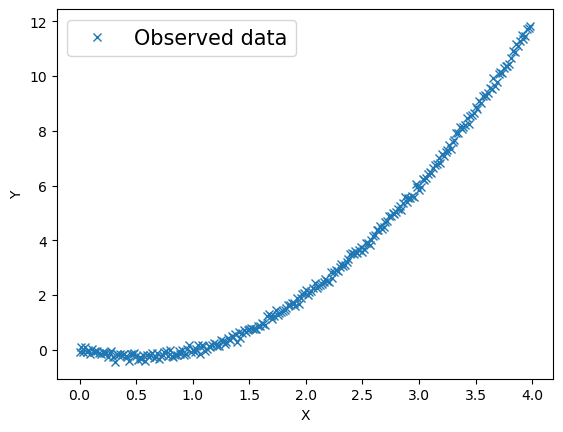

In [29]:
a_init, b_init = -1, 2

np.random.seed(0)
X_test = np.random.uniform(0, 4, 32)

plt.plot(xs[::50], ys[::50], ls='', marker='x', label='Observed data', alpha=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(fontsize=15)

In [31]:
random.Random(4).shuffle(xs)
random.Random(4).shuffle(ys)
print('x shape: ', xs.shape, 'y shape', ys.shape)

batch_size = 32
nb_batch_train = int((0.8*len(xs)) // batch_size)
# nb_batch_test = int((0.2*len(xs)) // batch_size)
print('number of batches for training:', nb_batch_train)
X_train = np.zeros((nb_batch_train, batch_size))
Y_train = np.zeros((nb_batch_train, batch_size))

for i in range(nb_batch_train):
    X_train[i, :] = xs[i*batch_size: (i+1)*batch_size]
    Y_train[i, :] = ys[i*batch_size: (i+1)*batch_size]

X_train = np.expand_dims(X_train, -1)
Y_train = np.expand_dims(Y_train, -1)
print('Final shape of the training set', X_train.shape)

x shape:  (12800,) y shape (12800,)
number of batches for training: 320
Final shape of the training set (320, 32, 1)


In [32]:
X = tfk.Input(shape=(1), dtype=tf.float32)
y = tfk.layers.Dense(4, activation='relu')(X)
y = tfk.layers.Dense(8, activation='relu')(y)
Y = tfk.layers.Dense(1)(y)

model = tfk.Model(X, Y, name='model')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 8         
                                                                 
 dense_7 (Dense)             (None, 8)                 40        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [33]:
optimizer = tfk.optimizers.RMSprop(learning_rate=1e-3)
loss_fn = tfk.losses.MSE

In [34]:
def train_model(X, Y, loss_fn):
    with tf.GradientTape() as tape:
        pred = model(X)
        loss = loss_fn(Y, pred)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return (np.mean(loss.numpy()))

In [35]:
losses = []
nb_epochs = 10


In [36]:
X_test = np.random.uniform(0.01,4, 32)
sorted_idx = np.argsort(X_test)


In [37]:
tests = np.zeros((nb_batch*nb_epochs, 32))
for epoch in range(nb_epochs):
    for batch in range(nb_batch_train):
        results = train_model(X_train[batch], Y_train[batch], loss_fn)
        losses.append(results)
        tests[(batch*epoch)+batch] = model(tf.expand_dims(X_test, -1))[:, 0]

In [38]:
pred = model(tf.expand_dims(X_test, -1)).numpy()

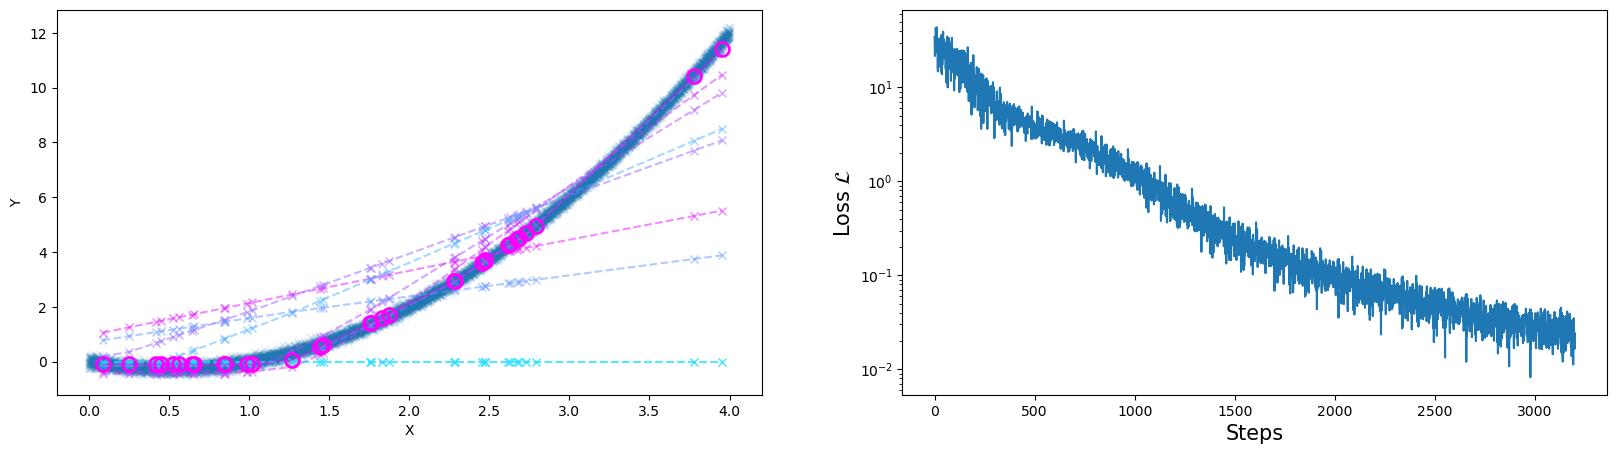

In [39]:
%matplotlib inline

from matplotlib.colors import LogNorm
fig, ax = plt.subplots(1, 2, figsize=(20,5))
cmap = plt.cm.cool
cmaplist = [cmap(i) for i in range(cmap.N)]


ax[0].plot(xs, ys, ls='', marker='x', alpha=0.1, label='Observed data')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
cmap_index = np.linspace(1, cmap.N, nb_epochs+1).astype('int')
for j, i in enumerate(np.logspace(0, np.log10(nb_epochs*nb_batch-1), nb_epochs).astype('int')):
        if j == 0:
            continue
#         print(j, i)
        ax[0].plot(X_test[sorted_idx], tests[i][sorted_idx], ls='--', marker='x', c=cmaplist[-cmap_index[j]], alpha=0.5)

ax[0].plot(X_test[sorted_idx], pred[:, 0][sorted_idx], ls='-', color=cmaplist[-1], marker='o', markeredgewidth=2, markersize=10, markerfacecolor='none', label='Random weights prediction', lw=0.5)




ax[1].plot(losses)
ax[1].set_xlabel('Steps', fontsize=15)
ax[1].set_ylabel(r'Loss $\mathcal{L}$', fontsize=15)
ax[1].set_yscale('log')
# cbar = plt.colorbar(img, orientation="vertical", fraction=0.1, pad=0.02, ax = ax[0])
# cbar.ax.set_ylabel('Steps', fontsize=15)
# cbar.set_ticks(np.linspace(0, nb_epochs*nb_batch, nb_epochs).astype('int'))
# cbar.ax.set_yticklabels(np.logspace(0, np.log10(nb_epochs*nb_batch), nb_epochs).astype('int'));

